In [29]:
##Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Lets import the trtaining data 


In [40]:
training_data = pd.read_csv('./alphaseq_data_train.csv')
sample = training_data[:300]
print(training_data.head())
print('___________________')
print(training_data.describe())
print('___________________')
print(str(training_data.shape[0]) + '  rows' + ', ' + str(training_data.shape[1]) + '  columns')

#Check for missing values
missing_kd = training_data['Kd'].isnull().sum()
missing_q = training_data['q_value'].isnull().sum()
if missing_kd:
    print('There are ' + str(missing_kd) + ' missing values in the Kd column')
if missing_q:
    print('There are ' + str(missing_q) + ' missing values in the q column')



  description_a                                         sequence_a  \
0          WT_0  QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...   
1          WT_1  QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...   
2         WT_10  QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...   
3         WT_11  QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...   
4         WT_12  QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...   

    description_alpha                                     sequence_alpha  \
0  huPD-1_RE(rebuilt)  LDSPDRPWNPPTFSPALLVVTEGDNATFTCSFSNTSESFVLNWYRM...   
1  huPD-1_RE(rebuilt)  LDSPDRPWNPPTFSPALLVVTEGDNATFTCSFSNTSESFVLNWYRM...   
2  huPD-1_RE(rebuilt)  LDSPDRPWNPPTFSPALLVVTEGDNATFTCSFSNTSESFVLNWYRM...   
3  huPD-1_RE(rebuilt)  LDSPDRPWNPPTFSPALLVVTEGDNATFTCSFSNTSESFVLNWYRM...   
4  huPD-1_RE(rebuilt)  LDSPDRPWNPPTFSPALLVVTEGDNATFTCSFSNTSESFVLNWYRM...   

         Kd  Kd_lower_bound  Kd_upper_bound  q_value  
0  1.241963        1.191959        1.291968      0.0  
1  1.379355 

In [34]:
#Lets create a function that shows us the distribution of any continuous variable within the data
#Bins is calculated by using Scott's Rule: bins = int((3.5 * np.std(data[column])) / (len(data[column])**(1/3)))

def plot_distribution(data, column, bins_manual):
    #print(data[column].shape)
    print(np.std(data[column]), '--- std')
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    print(iqr, '  ---- IQR ')
    bins = (2*iqr)/(len(data[column])**(1/3))
    print(bins, ' ---- number of suggested bins using Freedman - Diaconis Rule')
    
    if int(bins) > 10:
        data[column].hist(bins=bins).set_title('Distribution of ' + column + ' values for the training data')
    elif isinstance(bins_manual, int):
        bins = bins_manual
        data[column].hist(bins=bins).set_title('Distribution of ' + column + ' values for the training data')
    
    else:
        bins = 400
        data[column].hist(bins=bins).set_title('Distribution of ' + column + ' values for the training data')
    
    plt.xlabel(column +' values')
    plt.ylabel('Frequency')
    return plt.show()


#training_data['Kd'].hist(bins=100).set_title('Distribution of Kd values for the training data').set_xlabel('Kd values').set_ylabel('Frequency')

0.8027631885930249 --- std
0.8000592123847508   ---- IQR 
0.05146857190532994  ---- number of suggested bins using Freedman - Diaconis Rule


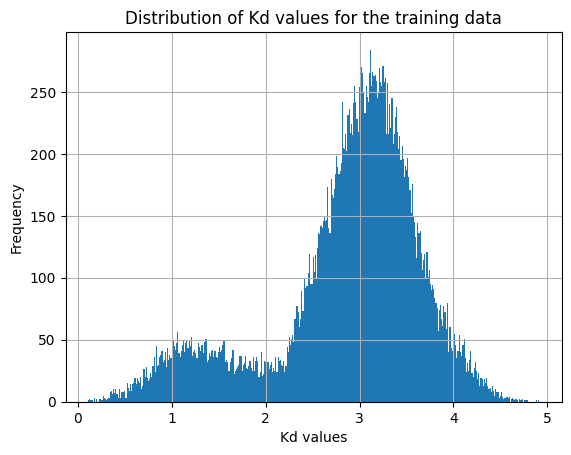

______________________________
0.45955672400428904 --- std
0.9990855107640032   ---- IQR 
0.06427212343078632  ---- number of suggested bins using Freedman - Diaconis Rule


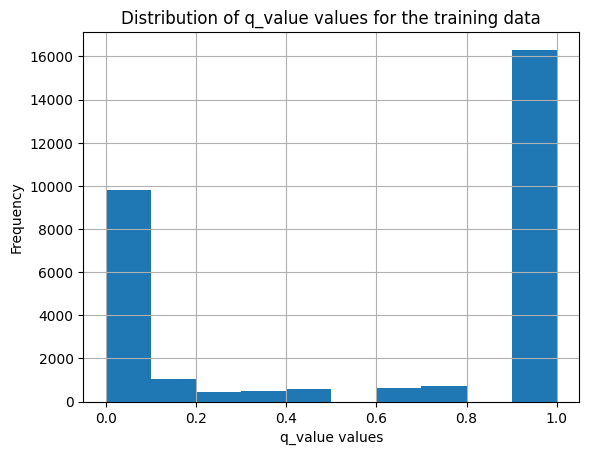

In [36]:
plot_distribution(data = training_data, column = 'Kd', bins_manual = 400)
print('______________________________')
plot_distribution(training_data, 'q_value', bins_manual = 10)